| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ANALISIS_DISCRIMINANTE.ipynb)|

# **4. ANÁLISIS DE COMPONENTES PRINCIPALES**

## **Aproximación algebraica**

La aproximación algebraica en el análisis de componentes principales (PCA, por sus siglas en inglés) se refiere al uso de métodos algebraicos para aproximar la solución del problema de reducción de dimensionalidad. PCA es una técnica que permite encontrar las direcciones principales de variabilidad en un conjunto de datos y proyectar los datos en un espacio de menor dimensión.

A continuación se presenta un ejemplo de cómo utilizar la aproximación algebraica en el análisis de componentes principales en Python utilizando la biblioteca scikit-learn:

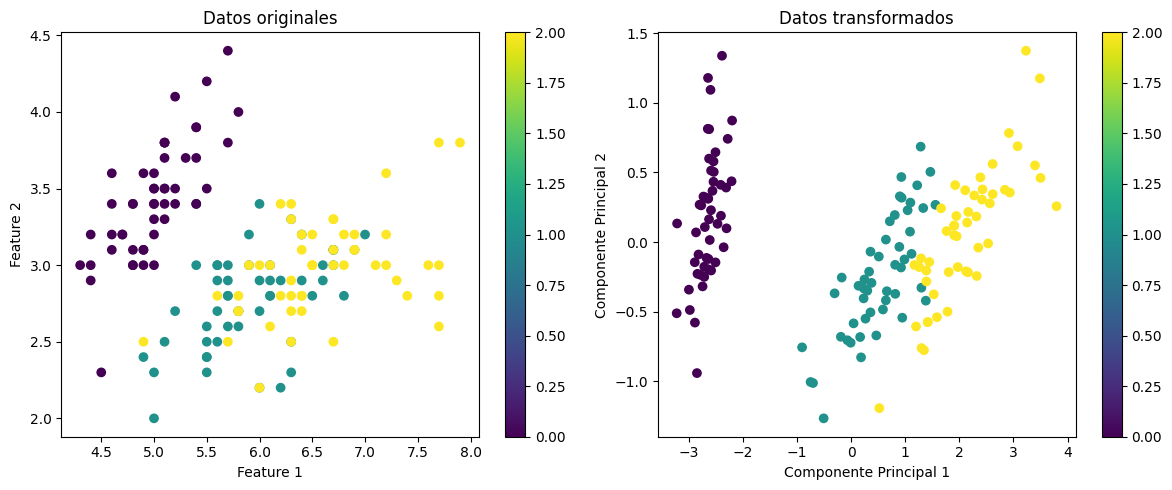

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Cargar el conjunto de datos de ejemplo
iris = load_iris()
X = iris.data

# Crear una instancia de PCA
pca = PCA(n_components=2)

# Ajustar el modelo a los datos
pca.fit(X)

# Obtener los componentes principales
components = pca.components_

# Obtener las varianzas explicadas
explained_variance = pca.explained_variance_ratio_

# Proyectar los datos en el espacio de menor dimensión
X_transformed = pca.transform(X)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 5))

# Graficar los datos originales
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datos originales')
plt.colorbar()

# Graficar los datos transformados
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos transformados')
plt.colorbar()

# Ajustar el diseño
plt.tight_layout()
plt.show()

En este ejemplo, se carga el conjunto de datos `Iris` y se aplica PCA para reducir la dimensión de los datos a dos componentes principales. Luego, se obtienen los componentes principales y se proyectan los datos originales en el nuevo espacio de menor dimensión. Por último, se grafican tanto los datos originales como los datos transformados.

La aproximación algebraica en PCA se basa en el uso de la descomposición de valores singulares (SVD) para calcular los componentes principales. Mediante el uso de técnicas algebraicas, se obtiene una solución aproximada que captura la mayor parte de la variabilidad en los datos, lo que permite reducir su dimensión sin perder demasiada información.

## **Componentes principales**

Los componentes principales en el Análisis de Componentes Principales (ACP) son combinaciones lineales de las variables originales que capturan la mayor parte de la varianza en los datos. Son vectores que definen direcciones en el espacio de características y se utilizan para proyectar los datos originales en un nuevo espacio de menor dimensión.

El objetivo del ACP es reducir la dimensionalidad de los datos mientras se conserva la mayor cantidad posible de información. Los componentes principales se calculan de manera que el primer componente principal capture la mayor varianza posible, el segundo componente principal capture la mayor varianza restante y así sucesivamente.

A continuación, se muestra un ejemplo de cómo calcular y utilizar los componentes principales en Python utilizando la biblioteca scikit-learn:

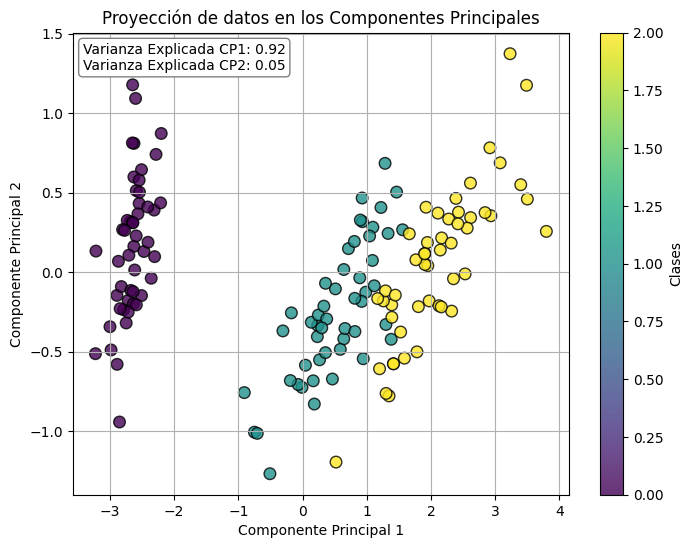

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Cargar el conjunto de datos de ejemplo
iris = load_iris()
X = iris.data
y = iris.target

# Realizar el Análisis de Componentes Principales (ACP)
pca = PCA(n_components=2)  # Especificar el número de componentes deseados
X_pca = pca.fit_transform(X)  # Calcular los componentes principales

# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Configurar el tamaño y estilo de la figura
plt.figure(figsize=(8, 6))

# Graficar los datos proyectados en los componentes principales
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=70, alpha=0.8)

# Añadir etiquetas y título
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de datos en los Componentes Principales')

# Añadir barra de colores
cbar = plt.colorbar(scatter)
cbar.set_label('Clases')

# Mostrar la varianza explicada en el gráfico
plt.annotate(f'Varianza Explicada CP1: {explained_variance[0]:.2f}\nVarianza Explicada CP2: {explained_variance[1]:.2f}',
             xy=(0.02, 0.92), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white'))

# Mostrar la grilla
plt.grid(True)

# Mostrar la gráfica
plt.show()

En este ejemplo, se cargan los datos de iris y se realiza el ACP para reducir la dimensionalidad a 2 componentes principales. Luego, se proyectan los datos en el nuevo espacio de 2 dimensiones y se grafican. Cada punto en el gráfico corresponde a una muestra de iris, y el color indica la clase a la que pertenece.

Los componentes principales se pueden interpretar en términos de la importancia relativa de las variables originales. Los coeficientes de los componentes principales indican la contribución de cada variable en la formación del componente. Un componente principal con coeficientes altos en ciertas variables indica que esas variables tienen un impacto significativo en la estructura de los datos.

Además, la varianza explicada por cada componente principal proporciona información sobre la cantidad de información retenida al proyectar los datos en ese componente. Una varianza explicada alta indica que ese componente retiene una cantidad sustancial de la variabilidad original de los datos.

## **Decisión sobre cuáles retener**

En el Análisis de Componentes Principales (ACP), una decisión importante es determinar cuántos componentes principales se deben retener para representar adecuadamente la estructura de los datos. Esto implica encontrar un equilibrio entre reducir la dimensionalidad y retener la mayor cantidad de información posible.

Existen diferentes métodos para tomar esta decisión, y a continuación se presentan dos enfoques comunes:

1. **Criterio de la varianza explicada acumulada:**

* Se calcula la proporción acumulada de la varianza explicada por cada componente principal.
* Se grafica la proporción acumulada en función del número de componentes.
* Se selecciona el número de componentes donde la proporción acumulada alcanza un valor aceptable, como el 80% o el 90%.
* Este enfoque garantiza que se retenga la mayor cantidad de varianza posible.

2. **Criterio del codo (scree plot):**

* Se calcula la varianza explicada por cada componente principal.
* Se grafica la varianza explicada en función del número de componentes.
* Se busca el punto de inflexión en la gráfica, donde la varianza explicada deja de disminuir significativamente.
* Este punto indica el número de componentes donde se obtiene la mayor ganancia de información con respecto a los componentes anteriores.

A continuación se muestra un ejemplo de cómo utilizar estos enfoques para tomar la decisión de cuántos componentes principales retener en Python:

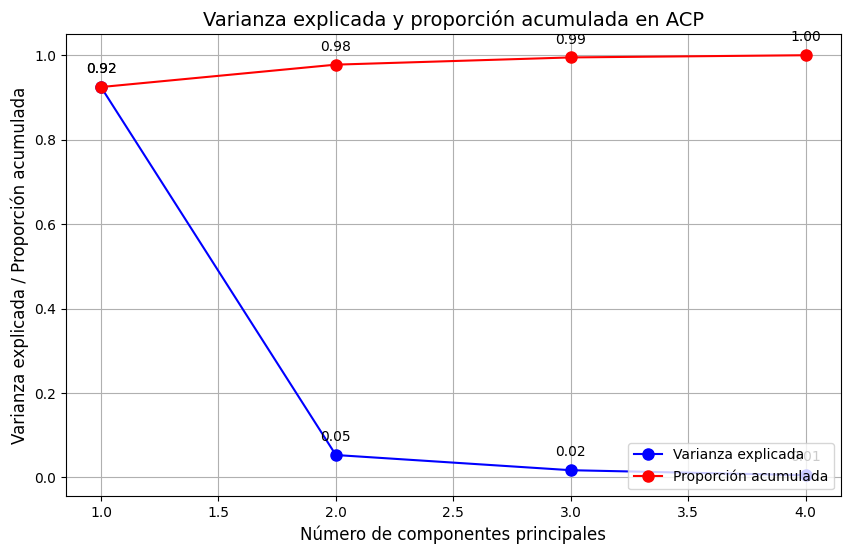

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Cargar el conjunto de datos de ejemplo
iris = load_iris()
X = iris.data

# Realizar el Análisis de Componentes Principales (ACP)
pca = PCA()
X_pca = pca.fit_transform(X)

# Calcular la varianza explicada y la proporción acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Configurar el tamaño y estilo de la figura
plt.figure(figsize=(10, 6))

# Graficar la varianza explicada y la proporción acumulada
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', label='Varianza explicada', markersize=8)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 'ro-', label='Proporción acumulada', markersize=8)
plt.xlabel('Número de componentes principales', fontsize=12)
plt.ylabel('Varianza explicada / Proporción acumulada', fontsize=12)
plt.legend(fontsize=10)
plt.title('Varianza explicada y proporción acumulada en ACP', fontsize=14)

# Añadir etiquetas a los puntos de varianza explicada
for i, txt in enumerate(explained_variance):
    plt.annotate(f'{txt:.2f}', (i + 1, explained_variance[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Añadir etiquetas a los puntos de proporción acumulada
for i, txt in enumerate(cumulative_variance):
    plt.annotate(f'{txt:.2f}', (i + 1, cumulative_variance[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar la posición de las leyendas
plt.legend(loc='lower right')

# Mostrar la gráfica
plt.grid(True)
plt.show()

En este ejemplo, se realiza el ACP utilizando todos los componentes principales disponibles. Luego, se calcula la varianza explicada y la proporción acumulada de la varianza explicada. Finalmente, se grafican ambas medidas. Observando la gráfica, se puede tomar una decisión sobre cuántos componentes principales retener, ya sea por el criterio de la varianza explicada acumulada o el criterio del codo.

Es importante destacar que la elección del número de componentes principales puede depender del contexto y los objetivos del análisis. En algunos casos, puede ser necesario retener un número mayor de componentes para preservar información relevante, mientras que en otros casos puede ser preferible una reducción más agresiva de la dimensionalidad.

## **Interpretación**

La interpretación en el Análisis de Componentes Principales (ACP) se refiere a la comprensión de los componentes principales y su relación con las variables originales. El objetivo es extraer información relevante y encontrar patrones en los datos a través de la combinación lineal de las variables originales.

Una vez que se ha realizado el ACP y se han obtenido los componentes principales, se puede interpretar su significado utilizando diferentes enfoques:

1. **Contribución de las variables:** Cada variable original tiene un peso o carga asociada a cada componente principal. Estas cargas representan la contribución de cada variable a la construcción del componente principal. Las cargas positivas indican una relación directa entre la variable y el componente, mientras que las cargas negativas indican una relación inversa. Al analizar las cargas de las variables, se pueden identificar las características más importantes para cada componente.

2. **Varianza explicada:** Cada componente principal tiene asociada una varianza explicada, que indica la proporción de la varianza total de los datos que se explica por ese componente. Cuanto mayor sea la varianza explicada, más información relevante contiene el componente. Se puede utilizar esta información para determinar cuántos componentes principales son necesarios para retener una cantidad aceptable de varianza.

3. **Gráficas de proyección:** Se pueden realizar proyecciones de los datos originales en los componentes principales para visualizar la relación entre las observaciones y los componentes. Esto permite identificar agrupamientos, patrones o tendencias en los datos. Por ejemplo, se pueden generar gráficas de dispersión en 2D o 3D utilizando los dos o tres primeros componentes principales.

A continuación se muestra un ejemplo de cómo interpretar los componentes principales utilizando código Python:

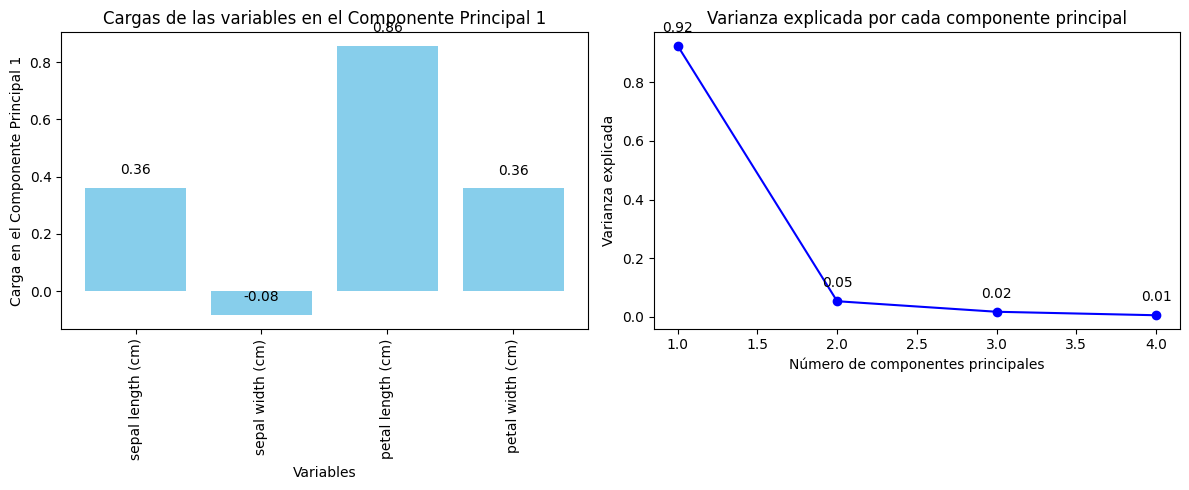

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Cargar el conjunto de datos de ejemplo
iris = load_iris()
X = iris.data

# Realizar el Análisis de Componentes Principales (ACP)
pca = PCA()
X_pca = pca.fit_transform(X)

# Obtener las cargas de las variables en cada componente principal
variable_loadings = pca.components_

# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Configurar el tamaño y estilo de la figura
plt.figure(figsize=(12, 5))

# Graficar las cargas de las variables en el primer componente principal
plt.subplot(1, 2, 1)
plt.bar(range(len(variable_loadings[0])), variable_loadings[0], color='skyblue')
plt.xticks(range(len(iris.feature_names)), iris.feature_names, rotation='vertical')
plt.xlabel('Variables')
plt.ylabel('Carga en el Componente Principal 1')
plt.title('Cargas de las variables en el Componente Principal 1')

# Añadir etiquetas a las barras
for i, txt in enumerate(variable_loadings[0]):
    plt.annotate(f'{txt:.2f}', (i, variable_loadings[0, i]), textcoords="offset points", xytext=(0,10), ha='center')

# Graficar la varianza explicada por cada componente principal
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por cada componente principal')

# Añadir etiquetas a los puntos
for i, txt in enumerate(explained_variance):
    plt.annotate(f'{txt:.2f}', (i + 1, explained_variance[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar la disposición de las subgráficas
plt.tight_layout()

# Mostrar la gráfica
plt.show()

En este ejemplo, se realiza el ACP sobre el conjunto de datos de iris. Luego, se obtienen las cargas de las variables en cada componente principal y se grafican en un gráfico de barras. Esto permite interpretar la contribución de cada variable al primer componente principal. Además, se muestra la varianza explicada por cada componente principal en un gráfico de línea.

Al interpretar los componentes principales y sus cargas, se puede obtener una mejor comprensión de las relaciones entre las variables originales y los patrones presentes en los datos. Esto facilita la identificación de las características más importantes y puede ser útil en tareas como la reducción de la dimensionalidad, la selección de variables o la detección de outliers.

| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ANALISIS_DISCRIMINANTE.ipynb)|